In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from acquire import acquire_lolz, check_csv, join_sales_items_store, erneuerbare_energie




In [2]:
df_stores = acquire_lolz('stores')
df_stores.head()

,store_address,store_city,store_id,store_state,store_zipcode
0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,9255 FM 471 West,San Antonio,2,TX,78251
2,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
3,516 S Flores St,San Antonio,4,TX,78204
4,1520 Austin Hwy,San Antonio,5,TX,78218


In [3]:
df_items = acquire_lolz('items')
df_items.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925
2,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
3,Boars Head,4,Boars Head Sliced White American Cheese - 120 Ct,3.14,208528800007,208528800007
4,Back To Nature,5,Back To Nature Gluten Free White Cheddar Rice ...,2.61,759283100036,759283100036


In [4]:
df = check_csv()
df.head(2)

,item,sale_amount,sale_date,sale_id,store
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1


In [5]:
df.rename(columns={'store': 'store_id', 'item':'item_id'}, inplace=True)
df = df.merge(right=df_stores, how='left', on='store_id', copy='False')
df = df.merge(right=df_items, how='left', on='item_id', copy='False')

In [6]:
print(df.shape)
df.head(2)

(913000, 14)


,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


1. Convert date column to datetime format.

In [7]:
#reassign the sale_date column to be a datetime type
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [8]:
df.head(1)

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,2013-01-01 00:00:00+00:00,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


2. Plot the distribution of sale_amount and item_price.

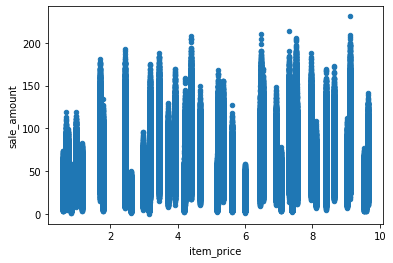

In [9]:
df.plot.scatter(y='sale_amount', x='item_price')

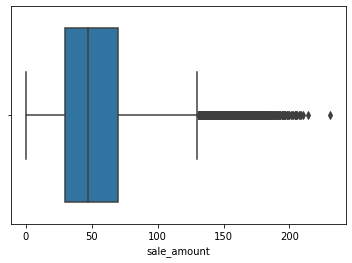

In [10]:
sns.boxplot(df.sale_amount)

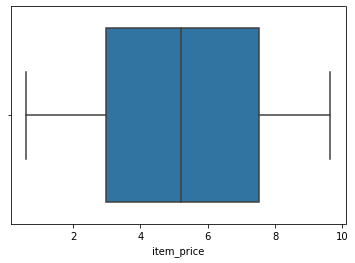

In [11]:
sns.boxplot(df.item_price)

3. Set the index to be the datetime variable.

In [12]:
# sort rows by the date and then set the index as the date
df = df.sort_values('sale_date').set_index('sale_date')

4. Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.

In [13]:
df['month'] = df.index.month_name()
df['day_of_the_week'] = df.index.day_name()


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [14]:
df['sales_total'] = df.item_price * df.sale_amount
df.head(1)

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_the_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92


6. Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.

In [15]:
df['diff_day_sales_total'] = df.sales_total.diff(500)

# Ze Good German Data

In [16]:
datarahmen = erneuerbare_energie()
datarahmen.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


1. Convert date column to datetime format.

In [17]:
def convert_date_time(df):
    df['Date'] = pd.to_datetime(df['Date'])
    return df
df = convert_date_time(datarahmen)
df.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


2. Plot the distribution of each of your variables.

(array([162., 492., 665., 372., 207., 120.,  72.,  58.,  29.,  10.]),
 array([ 21.478 , 104.4858, 187.4936, 270.5014, 353.5092, 436.517 ,
        519.5248, 602.5326, 685.5404, 768.5482, 851.556 ]),
 <a list of 10 Patch objects>)

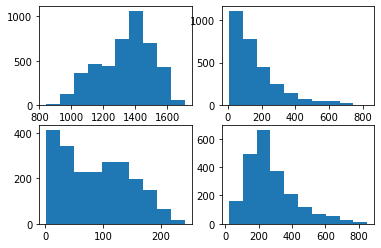

In [18]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(df.Consumption)
axs[0, 1].hist(df.Wind)
axs[1, 0].hist(df.Solar)
axs[1, 1].hist(df['Wind+Solar'])

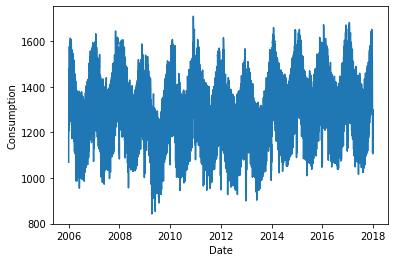

In [19]:
sns.lineplot(x='Date', y='Consumption', data=df)

3.Set the index to be the datetime variable.

In [20]:
df = df.set_index('Date')

4. Add a month and a year column to your dataframe.

In [21]:
df['month'] = df.index.month_name()
df['year'] = df.index.year

5. make it reproducible

## Vega-Datasets

    Install Vega data sets

In [22]:
# pip install vega_datasets

In [27]:
from vega_datasets import data
df = data.sf_temps()

In [30]:
df = df.set_index('date')

KeyError: "None of ['date'] are in the columns"

In [31]:
df.head(2)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4


1.  Resample by the day and take the average temperature. Visualize the average temperature over time.

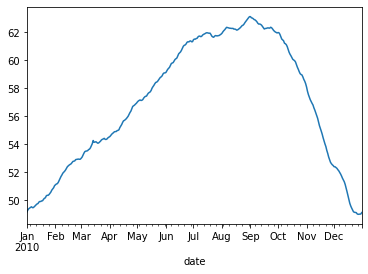

In [36]:
daily_temp = df.temp.resample("D").mean()
daily_temp.plot()

2. Write the code necessary to visualize the minimum temperature over time.

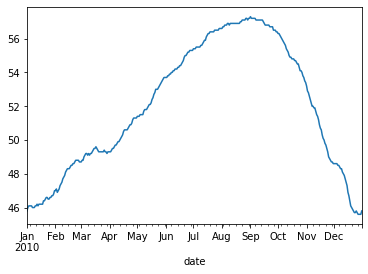

In [37]:
df.temp.resample("D").min().plot()

3. Write the code necessary to visualize the maximum temperature over time.

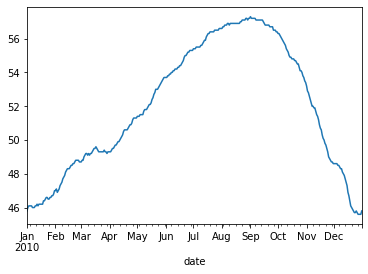

In [38]:
df.temp.resample("D").min().plot()

4. Which month has the highest average temperature?

In [45]:
df.temp.resample("M").min().nsmallest(1)

date
2010-12-31    45.6
Freq: M, Name: temp, dtype: float64

5. Which month has the highest average temperature?

In [46]:
df.temp.resample("M").max().nlargest(1)

date
2010-08-31    72.2
Freq: M, Name: temp, dtype: float64

6. 
    - Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
    - Use this resampled dataframe to calculate the change in temperature for the day. 
    - Which month has the highest daily temperature variability?

In [65]:
daily_temp = pd.DataFrame(df.temp.resample("D").agg(['min', 'max']))
daily_temp.head(1)

,min,max
date,,
2010-01-01,45.8,53.3


In [74]:
daily_temp['min_diff'] = daily_temp['min'].diff(1)
daily_temp['max_diff'] = daily_temp['max'].diff(1)
daily_temp.head()

,min,max,min_diff,max_diff
date,,,,
2010-01-01,45.8,53.3,NaN,NaN
2010-01-02,46.0,53.4,0.2,0.1
2010-01-03,46.1,53.5,0.1,0.1
2010-01-04,46.1,53.6,0.0,0.1
2010-01-05,46.1,53.8,0.0,0.2


In [80]:
daily_temp.min_diff.resample("M").agg(['min', 'max'])

,min,max
date,,
2010-01-31,-0.1,0.2
2010-02-28,-0.2,0.2
2010-03-31,-0.1,0.2
2010-04-30,0.0,0.2
2010-05-31,0.0,0.2
2010-06-30,0.0,0.2
2010-07-31,0.0,0.2
2010-08-31,-0.1,0.1
2010-09-30,-0.2,0.1


Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


## Use the Vega_Datasets to work with the flights_20k data

In [81]:
df = data.flights_20k()

In [82]:
df.head(2)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP


1. Convert any negative delays to 0.

In [90]:
df.delay = df.delay.apply(lambda x: 0 if x < 0 else x)

In [100]:
df.delay.describe()

count    20000.000000
mean        11.119450
std         23.527015
min          0.000000
25%          0.000000
50%          0.000000
75%         12.000000
max        509.000000
Name: delay, dtype: float64

2. Which hour of the day has the highest average delay?

In [93]:
df = df.set_index('date')

In [102]:
df['flight_hour'] = df.index.hour
df.groupby('flight_hour').delay.mean().nlargest(1)

flight_hour
3    302.5
Name: delay, dtype: float64

In [104]:
df.groupby('flight_hour').delay.mean().mean()

39.487335903739755